# Demand Forecasting for Walmart Retail Stores

Goal:
Predict weekly sales to optimize inventory and staffing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv("D:/My Projects/demand-forecasting/data/walmart_sales.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
weekly_sales = weekly_sales.sort_values("Date")


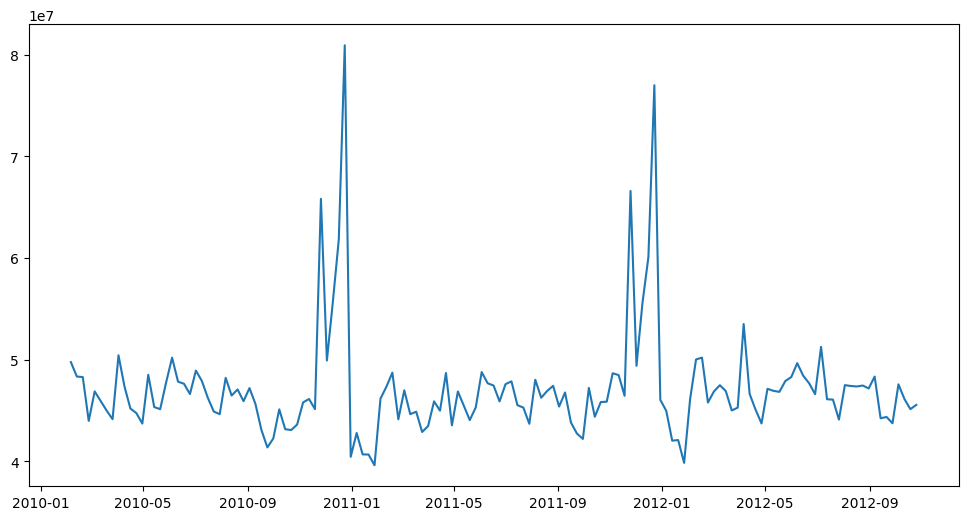

In [4]:
plt.figure(figsize=(12,6))
plt.plot(weekly_sales["Date"], weekly_sales["Weekly_Sales"])
plt.show()


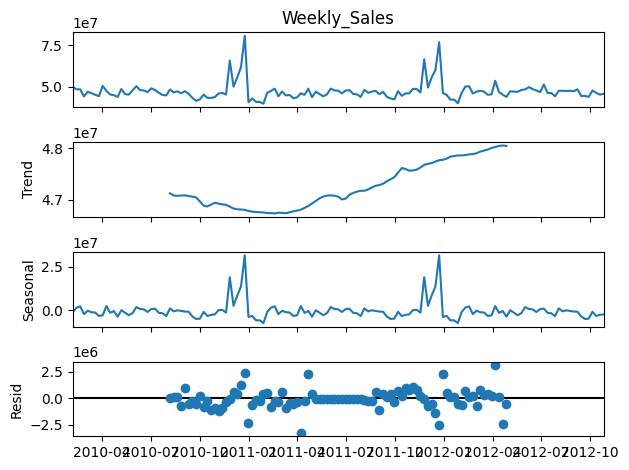

In [5]:
weekly_sales.set_index("Date", inplace=True)
decomposition = seasonal_decompose(weekly_sales["Weekly_Sales"], period=52)
decomposition.plot()
plt.show()


In [6]:
comparison = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA"],
    "MAPE": [0.03, 0.025]
})
comparison


,Model,MAPE
0,ARIMA,0.030
1,SARIMA,0.025
